In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
dir_plots = os.path.join('..', 'plots')

In [3]:
submissions = [
    { #task 1
        'micro_1': 0.7427,
        'macro_1': 0.6353,
        'micro_2': 0.7291,
        'macro_2': 0.5854
    },
    { #task 2
        'micro_1': 0.6367,
        'macro_1': 0.5190,
        'micro_2': 0.6199,
        'macro_2': 0.4714
    }
]

# Ploting function

In [4]:
def plot(micro, macro, x_labels, plot_name):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    for index, summsission in enumerate(submissions):  
        ax[index].plot(micro[index], color='tab:red', label='micro', marker='o')
        ax[index].plot(macro[index], color='tab:green', label='macro', marker='v')

        ax[index].set_ylim(0, 1)
        if index == 0:
            ax[index].set_ylabel('Average F score')
        ax[index].set_xlabel('Features')

        ax[index].axhline(y=summsission['micro_1'], ls='-', color='tab:pink', label='BRNIR-1 micro F=%s' % summsission['micro_1'])
        ax[index].axhline(y=summsission['macro_1'], ls='--', color='tab:cyan', label='BRNIR-1 macro F=%s' % summsission['macro_1'])
        ax[index].axhline(y=summsission['micro_2'], ls='-.', color='tab:pink', label='BRNIR-2 micro F=%s' % summsission['micro_2'])
        ax[index].axhline(y=summsission['macro_2'], ls=':', color='tab:cyan', label='BRNIR-2 macro F=%s' % summsission['macro_2'])
        ax[index].legend()

        ax[index].set_xticks(np.arange(len(x_labels)))
        ax[index].set_xticklabels(x_labels, rotation=90, fontsize=14)
    
    pp = PdfPages(os.path.join(dir_plots, '%s.pdf' % plot_name))
    plt.savefig(pp, format='pdf', bbox_inches='tight')
    pp.close()
    


# Single features

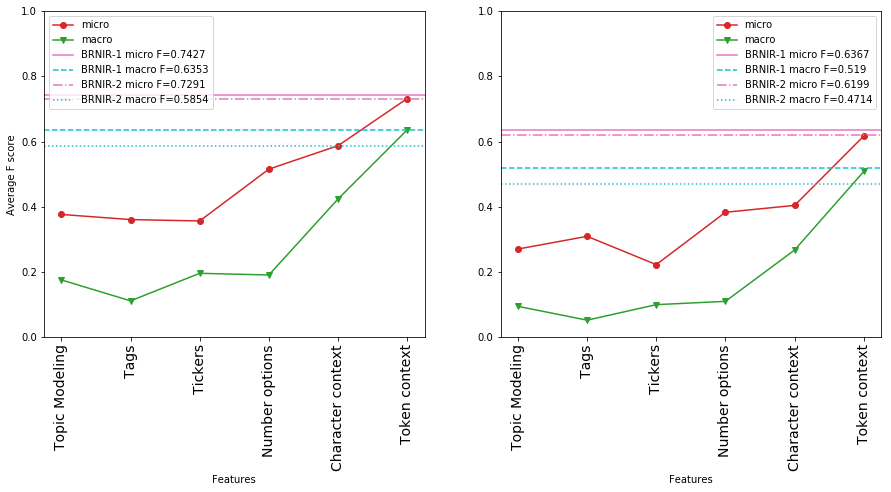

In [5]:
single_names = ['Topic Modeling', 'Tags', 'Tickers', 'Number options', 'Character context', 'Token context']
single_micro_1 = [0.376668, 0.360913, 0.356714, 0.515644, 0.587475, 0.732079]
single_macro_1 = [0.175981, 0.111746, 0.196186, 0.191100, 0.424241, 0.636141]
single_micro_2 = [0.270573, 0.309556, 0.222860, 0.383353, 0.404394, 0.617138]
single_macro_2 = [0.094935, 0.052522, 0.100117, 0.110233, 0.267637, 0.508451]

plot([single_micro_1, single_micro_2], [single_macro_1, single_macro_2], single_names, 'subtasks_single_features')

# Combinations of features

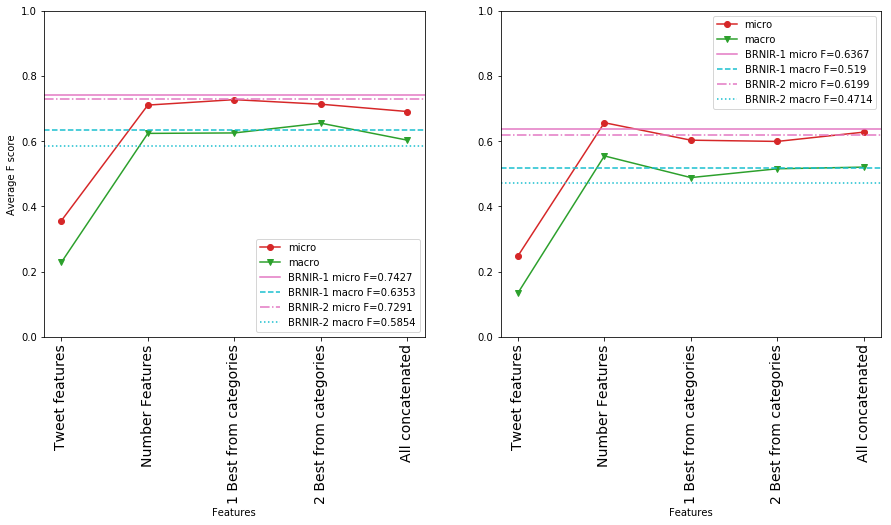

In [6]:
combo_names = ['Tweet features', 'Number Features', '1 Best from categories', '2 Best from categories', 'All concatenated']
combo_micro_1 = [0.356450, 0.710814, 0.727482, 0.713535, 0.691097]
combo_macro_1 = [0.228770, 0.624048, 0.625405, 0.655405, 0.603305]
combo_micro_2 = [0.248214, 0.656802, 0.603222, 0.599417, 0.627900]
combo_macro_2 = [0.134677, 0.554964, 0.488527, 0.515538, 0.520648]

plot([combo_micro_1, combo_micro_2], [combo_macro_1, combo_macro_2], combo_names, 'subtask_1_concat_features')




# All runs in one plot

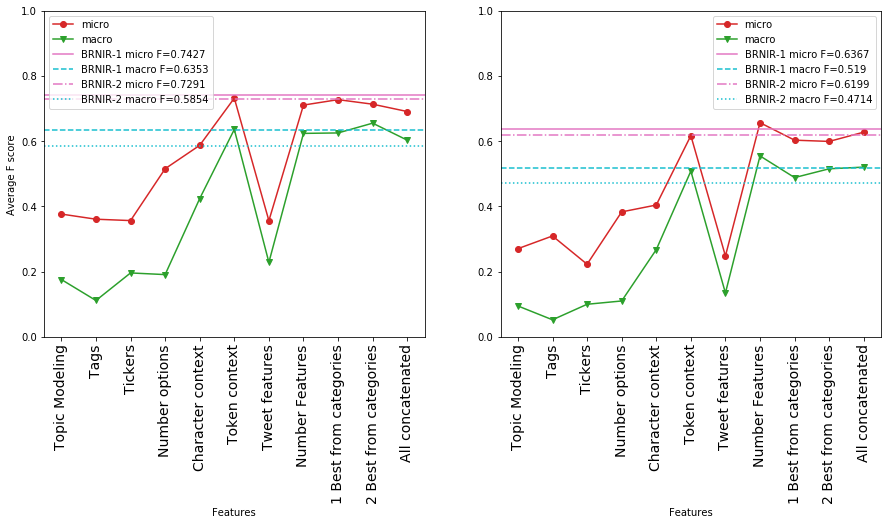

In [7]:
super_combo_names = ['Topic Modeling', 'Tags', 'Tickers', 'Number options', 'Character context', 'Token context', 'Tweet features', 'Number Features', '1 Best from categories', '2 Best from categories', 'All concatenated']
super_combo_micro_1 = [0.376668, 0.360913, 0.356714, 0.515644, 0.587475, 0.732079, 0.356450, 0.710814, 0.727482, 0.713535, 0.691097]
super_combo_macro_1 = [0.175981, 0.111746, 0.196186, 0.191100, 0.424241, 0.636141, 0.228770, 0.624048, 0.625405, 0.655405, 0.603305]
super_combo_micro_2 = [0.270573, 0.309556, 0.222860, 0.383353, 0.404394, 0.617138, 0.248214, 0.656802, 0.603222, 0.599417, 0.627900]
super_combo_macro_2 = [0.094935, 0.052522, 0.100117, 0.110233, 0.267637, 0.508451, 0.134677, 0.554964, 0.488527, 0.515538, 0.520648]

plot([super_combo_micro_1, super_combo_micro_2], [super_combo_macro_1, super_combo_macro_2], super_combo_names, 'subtasks_super_combo_features')




# Distribution for classes

In [8]:
dir_data = os.path.join('..', 'data', 'raw')

files = [
    'FinNum_train_all_with_GS.json',
    'FinNum_dev_all_with_GS.json'
]

In [9]:
visited = set()
data_all = {
    'numbers': [],
    'classes': [],
    'subclasses': []
}
for file in files:
    data_json = json.load(open(os.path.join(dir_data, file)))
    for entry in data_json:
        if entry['idx'] in visited:
            print('Duplicate idx: %s' % entry['idx'])
            continue
        
        visited.add(entry['idx'])    
        data_all['numbers'].append(len(entry['target_num']))
        data_all['classes'].append(len(set(entry['category'])))
        data_all['subclasses'].append(len(set(entry['subcategory'])))

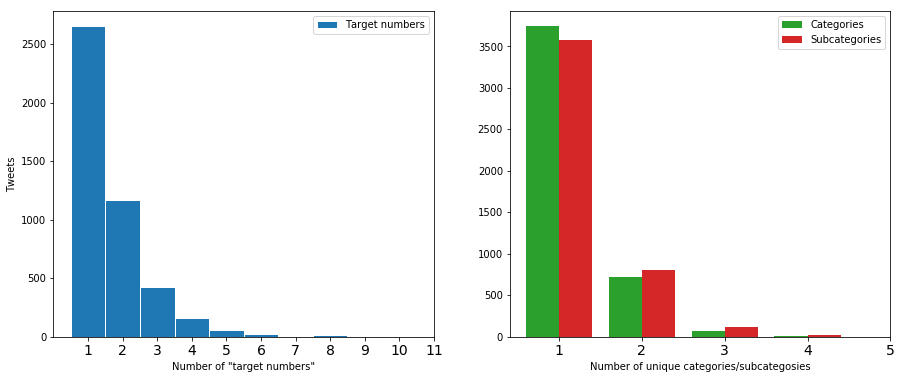

In [10]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))
bins = range(1, 12)
ax[0].hist(
    data_all['numbers'],
    bins,
    align='left',
    color=['tab:blue'],
    label=['Target numbers'],
    edgecolor='white',
    linewidth=1
)
ax[0].set_xticks(bins)
ax[0].set_xticklabels(bins, fontsize=14)
ax[0].set_xlabel('Number of "target numbers"')
ax[0].set_ylabel('Tweets')
ax[0].legend()

bins = range(1, 6)
ax[1].hist(
    [data_all['classes'],data_all['subclasses']],
    bins,
    align='left',
    color=['tab:green', 'tab:red'],
    label=['Categories', 'Subcategories']
)
ax[1].set_xticks(bins)
ax[1].set_xticklabels(bins, fontsize=14)
ax[1].legend()
ax[1].set_xlabel('Number of unique categories/subcategosies')

pp = PdfPages(os.path.join(dir_plots, 'statistics_tweets.pdf'))
plt.savefig(pp, format='pdf', bbox_inches='tight')
pp.close()

# Gap improvements

## Tweet features

### Subtask1

In [11]:
old = 0.360913 - 0.111746     
new = 0.356450 - 0.228770

(new - old)/old * 100

-48.75725918761313

### Subtask2

In [12]:
old = 0.309556 - 0.052522
new = 0.248214 -0.134677
(new - old)/old * 100

-55.82802275185384

([<matplotlib.patches.Wedge at 0x116e467b8>,
 [Text(0.9910657451172095, 0.47727213291294374, ''),
  Text(-0.9910657227744873, -0.47727217930807914, '')])

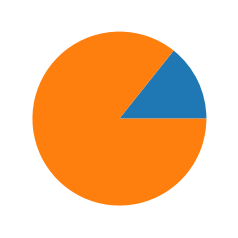

In [13]:
a = [50, 300]
plt.pie(a)